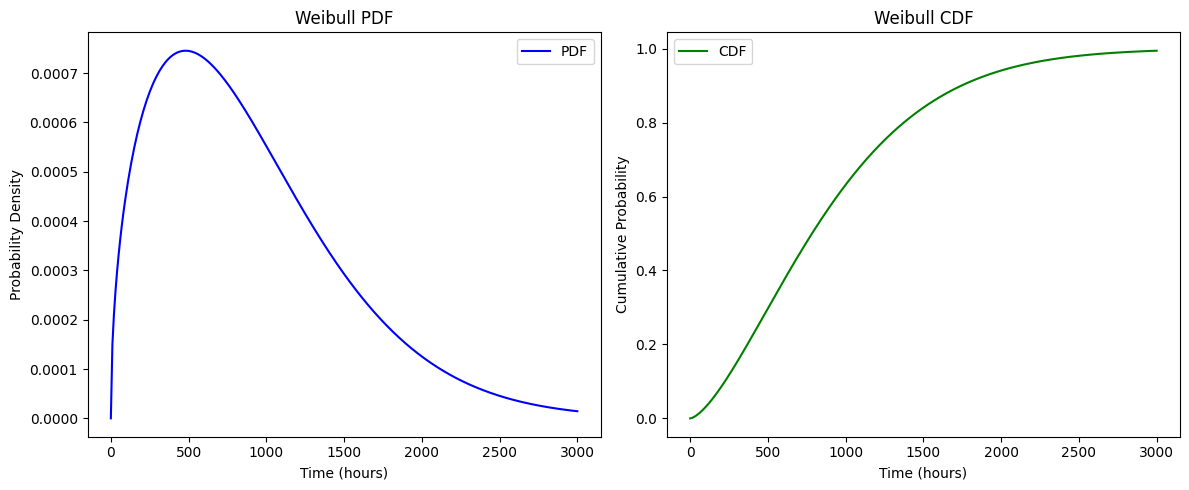

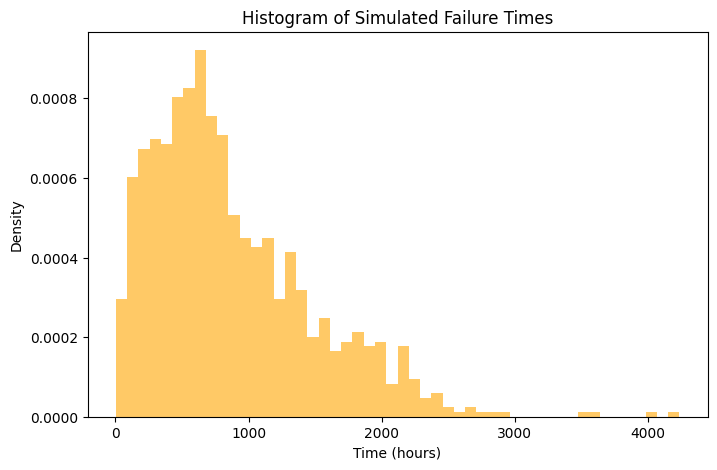

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Set the Weibull parameters
shape_param = 1.5  # The shape parameter (k); adjust to reflect failure mode (k<1, k=1, or k>1)
scale_param = 1000  # The scale parameter (lambda); represents the characteristic life

# Generate a range of time values (e.g., operating hours)
x = np.linspace(0, 3000, 300)

# Calculate the PDF and CDF for the Weibull distribution
pdf_values = weibull_min.pdf(x, shape_param, scale=scale_param)
cdf_values = weibull_min.cdf(x, shape_param, scale=scale_param)

# Plot the PDF and CDF side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.title("Weibull PDF")
plt.xlabel("Time (hours)")
plt.ylabel("Probability Density")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='green')
plt.title("Weibull CDF")
plt.xlabel("Time (hours)")
plt.ylabel("Cumulative Probability")
plt.legend()

plt.tight_layout()
plt.show()

# Generate random samples from the Weibull distribution
n_samples = 1000
failure_times = weibull_min.rvs(shape_param, scale=scale_param, size=n_samples)

# Plotting a histogram of the simulated failure times
plt.figure(figsize=(8, 5))
plt.hist(failure_times, bins=50, density=True, alpha=0.6, color='orange')
plt.title("Histogram of Simulated Failure Times")
plt.xlabel("Time (hours)")
plt.ylabel("Density")
plt.show()


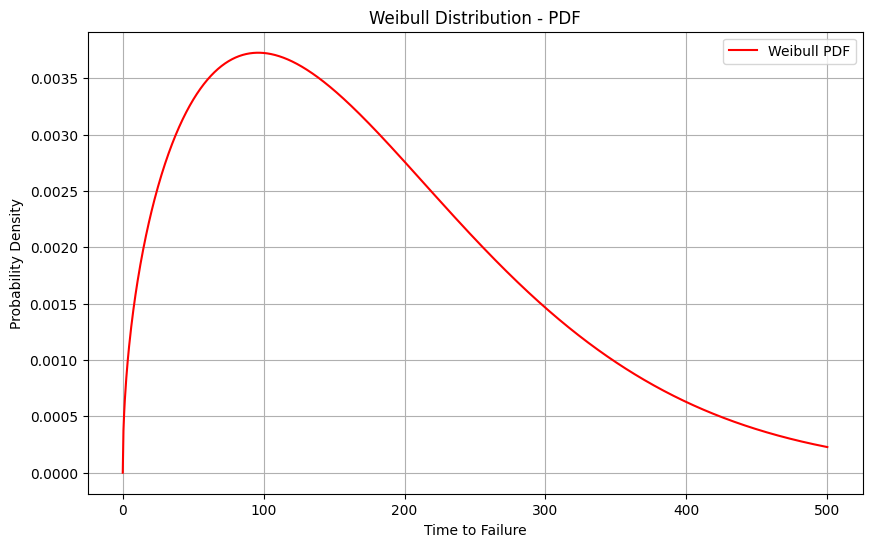

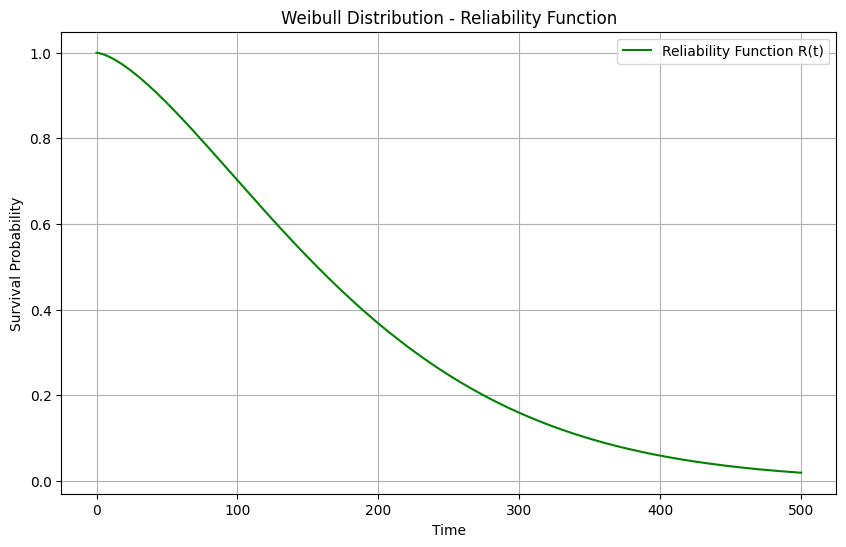

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define Weibull parameters
shape = 1.5    # β: shape parameter
scale = 200    # η: scale parameter
# Optional: location parameter, typically set to 0 if not used
location = 0

# Time grid for plotting
t = np.linspace(0, 500, 1000)

# Compute Weibull PDF (when location is 0)
pdf_weibull = (shape / scale) * ((t - location) / scale)**(shape - 1) * np.exp(-((t - location) / scale)**shape)
pdf_weibull[t < location] = 0  # Ensure pdf is 0 before the location parameter

# Compute Weibull Reliability Function: R(t) = exp(-((t - location)/scale)^shape)
R_weibull = np.exp(-((t - location) / scale)**shape)
R_weibull[t < location] = 1  # Survival probability is 1 before the location threshold

# Plotting the Weibull PDF and Reliability Function
plt.figure(figsize=(10, 6))
plt.plot(t, pdf_weibull, label='Weibull PDF', color='red')
plt.xlabel('Time to Failure')
plt.ylabel('Probability Density')
plt.title('Weibull Distribution - PDF')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, R_weibull, label='Reliability Function R(t)', color='green')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Weibull Distribution - Reliability Function')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from scipy.special import gamma as _gamma

def weibull_mean(beta, eta, gamma):
    """
    Calculate the mean of the Weibull distribution.
    
    Parameters
    ----------
    beta : float
        The shape parameter of the Weibull distribution.
    eta : float
        The scale parameter of the Weibull distribution.
    gamma : float
        The location parameter of the Weibull distribution.
        
    Returns
    -------
    float
        The mean of the Weibull distribution.
    """
    return eta * _gamma(1 + 1 / beta) + gamma

weibull_mean(1.5, 20000, 0)  # Example usage

np.float64(18054.905859018672)